In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlxtend in c:\users\aishwarya\anaconda3\lib\site-packages (0.23.0)



converting csv to transaction data

In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv('Musk_Cleaned.csv')

# Convert column to a list of lists
transactions = [[item] for item in df["cleaned"].tolist()]

# Save transactional dataset to CSV file
with open('output_file.csv', 'w') as f:
    for transaction in transactions:
        f.write(','.join(transaction) + '\n')

In [2]:
df.head(10)

,cleaned
0,openai ha respond to a lawsuit file by musk sa...
1,in a followup to a tent rule made in decemb a ...
2,last summer musk began rate limit the number o...
3,what s new and miss in appl s new macbook lapt...
4,musk say neuralink s first human trial subject...
5,the food and drug administr ha given the green...
6,the creator of a popular nintendo switch emul ...
7,x ha onc again quietli chang it rule around de...
8,ai chip from startup groq allow chatbot to ans...
9,journalist creator and long wind vc on x now h...


In [3]:
transaction

['a member of a cybertruck owner forum say they were warn that rain could caus their vehicl to rust when collect their tesla']

In [5]:
import pandas as pd

# read in CSV file with one column of textual data
#df = pd.read_csv('Musk_Cleaned.csv')

# tokenize the text data into sets of words
transactions = []
for i in range(len(df)):
    transaction = set(df.iloc[i, 0].split())
    transactions.append(transaction)

# write transaction dataset to CSV file
with open('Musk_Cleaned_transactions.csv', 'w') as f:
    for transaction in transactions:
        line = ','.join(transaction) + '\n'
        f.write(line)

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load CSV file
df = pd.read_csv('Musk_Cleaned.csv')

# Define English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words and tokenize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return filtered_tokens

# Tokenize and remove stop words from the "cleaned" column
df['cleaned'] = df['cleaned'].apply(preprocess_text)

# Filter transactions where "musk" appears in the left-hand side
transactions = []
for i in range(len(df)):
    if 'musk' in df.iloc[i, 0]:
        transaction = set(df.iloc[i, 0])
        transactions.append(transaction)

# Write transaction dataset to CSV file
with open('Musk_Cleaned_transactions_new.csv', 'w') as f:
    for transaction in transactions:
        line = ','.join(transaction) + '\n'
        f.write(line)


In [31]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transactions to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Use apriori to get the rules
frequent_itemsets = apriori(df_encoded, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)

# Sort rules by confidence
sorted_rules = rules.sort_values(by='confidence', ascending=False)

# Print the top 10 rules
sorted_rules.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ai),(musk),0.112903,1.000000,0.112903,1.0,1.000000,0.000000,inf,0.000000
98,"(post, appear)",(musk),0.145161,1.000000,0.145161,1.0,1.000000,0.000000,inf,0.000000
168,(readwrit),"(post, musk)",0.145161,0.225806,0.145161,1.0,4.428571,0.112383,inf,0.905660
170,"(first, appear, post)",(musk),0.145161,1.000000,0.145161,1.0,1.000000,0.000000,inf,0.000000
171,"(first, appear, musk)",(post),0.145161,0.225806,0.145161,1.0,4.428571,0.112383,inf,0.905660
172,"(first, musk, post)",(appear),0.145161,0.161290,0.145161,1.0,6.200000,0.121748,inf,0.981132
173,"(post, appear, musk)",(first),0.145161,0.177419,0.145161,1.0,5.636364,0.119407,inf,0.962264
174,"(first, appear)","(post, musk)",0.145161,0.225806,0.145161,1.0,4.428571,0.112383,inf,0.905660
175,"(first, post)","(appear, musk)",0.145161,0.161290,0.145161,1.0,6.200000,0.121748,inf,0.981132
177,"(post, appear)","(first, musk)",0.145161,0.177419,0.145161,1.0,5.636364,0.119407,inf,0.962264


In [32]:

# Selecting rules with 'musk' in LHS
musk_rules = rules[rules['antecedents'].apply(lambda x: 'openai' in x)]

# Sort musk rules by support
sorted_musk_rules = musk_rules.sort_values(by='support', ascending=False)

# Print the top 20 musk rules
sorted_musk_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,(openai),(musk),0.274194,1.000000,0.274194,1.000000,1.000000,0.000000,inf,0.00
42,(openai),(lawsuit),0.274194,0.129032,0.129032,0.470588,3.647059,0.093652,1.645161,1.00
152,"(openai, lawsuit)",(musk),0.129032,1.000000,0.129032,1.000000,1.000000,0.000000,inf,0.00
153,"(openai, musk)",(lawsuit),0.274194,0.129032,0.129032,0.470588,3.647059,0.093652,1.645161,1.00
155,(openai),"(lawsuit, musk)",0.274194,0.129032,0.129032,0.470588,3.647059,0.093652,1.645161,1.00
71,(openai),(post),0.274194,0.225806,0.080645,0.294118,1.302521,0.018730,1.096774,0.32
158,"(post, openai)",(musk),0.080645,1.000000,0.080645,1.000000,1.000000,0.000000,inf,0.00
160,"(openai, musk)",(post),0.274194,0.225806,0.080645,0.294118,1.302521,0.018730,1.096774,0.32
162,(openai),"(post, musk)",0.274194,0.225806,0.080645,0.294118,1.302521,0.018730,1.096774,0.32


In [46]:
# Selecting rules with 'musk' in LHS
musk_rules = rules[rules['antecedents'].apply(lambda x: 'musk' in x)]

# Sort musk rules by support
sorted_musk_rules = musk_rules.sort_values(by='support', ascending=False)

# Print the top 20 musk rules
sorted_musk_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
49,(musk),(openai),1.000000,0.274194,0.274194,0.274194,1.000000,0.000000,1.000000,0.000000
35,(musk),(hi),1.000000,0.241935,0.241935,0.241935,1.000000,0.000000,1.000000,0.000000
51,(musk),(post),1.000000,0.225806,0.225806,0.225806,1.000000,0.000000,1.000000,0.000000
59,(musk),(say),1.000000,0.209677,0.209677,0.209677,1.000000,0.000000,1.000000,0.000000
69,(musk),(x),1.000000,0.209677,0.209677,0.209677,1.000000,0.000000,1.000000,0.000000
67,(musk),(twitter),1.000000,0.193548,0.193548,0.193548,1.000000,0.000000,1.000000,0.000000
33,(musk),(ha),1.000000,0.193548,0.193548,0.193548,1.000000,0.000000,1.000000,0.000000
25,(musk),(first),1.000000,0.177419,0.177419,0.177419,1.000000,0.000000,1.000000,0.000000
9,(musk),(appear),1.000000,0.161290,0.161290,0.161290,1.000000,0.000000,1.000000,0.000000
197,(musk),"(first, readwrit, appear)",1.000000,0.145161,0.145161,0.145161,1.000000,0.000000,1.000000,0.000000


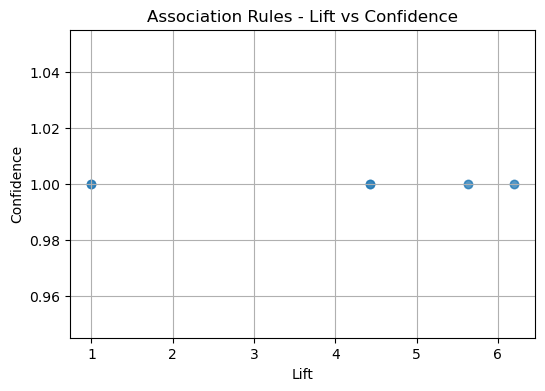

In [50]:
import matplotlib.pyplot as plt

# Select top 10 rules for plotting
sorted_rules = sorted_rules.head(10)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(sorted_rules['lift'], sorted_rules['confidence'], alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Association Rules - Lift vs Confidence')
plt.grid(True)
plt.show()


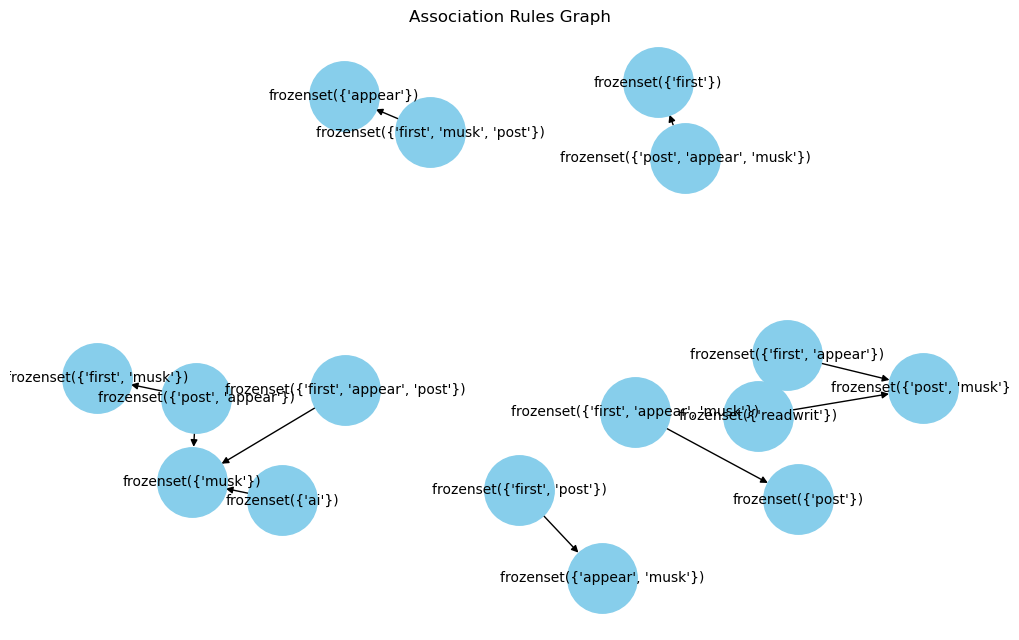

In [48]:
import networkx as nx

# Create directed graph from association rules
G = nx.from_pandas_edgelist(subrulesK, source='antecedents', target='consequents', edge_attr=True, create_using=nx.DiGraph())

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', font_size=10, arrows=True)
plt.title('Association Rules Graph')
plt.show()
